In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
#import os
#os.chdir("/content/drive/My Drive/Colab Notebooks/CarECU")
#os.getcwd()

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from function import getS,getUs,getMs,changeCol

In [4]:
ECU = pd.read_csv('./data/ECU完整数据.csv',sep=',')
# ECU = pd.read_csv('ECU数据.csv',sep=',')
ECU['Timestamp']=ECU['Timestamp'].apply(lambda x:getMs(x))
ECU['Data']=ECU['Data'].apply(lambda x:int(x.replace(' ',''),16))

ECU

,Timestamp,ECUID,DataCount,Data
0,1,624,8,1873569228003475456
1,3,0B0,6,0
2,3,0B2,6,0
3,3,20,3,14680071
4,4,22,8,144396663052566573
...,...,...,...,...
57713,74356,0B2,6,7997351526400
57714,74356,20,3,14680071
57715,74356,25,8,1147995625479234757
57716,74357,22,8,144115188075855916


In [5]:
dic = {'Fuel':'398','TP':'2C1','WSPD34':'0B2','WSPD12':'0B0','PRND':'3B4','SA':'25','ES':'2C4','BP':'224','AC':'380','OD':'611'}
ECUIDS=pd.DataFrame(ECU,columns=['Timestamp','ECUID','Data'])
ECUList = []
for i in dic:
    temp = locals()['ECU' + str(i)]=changeCol(ECUIDS,dic[i],i)
    ECUList.append(temp)

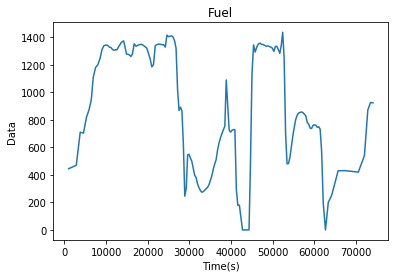

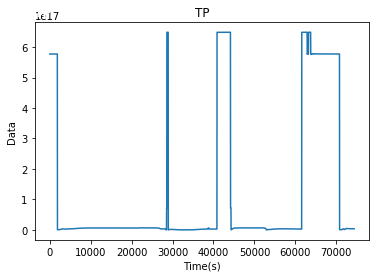

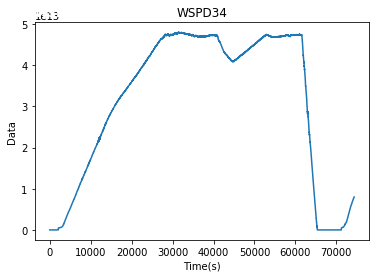

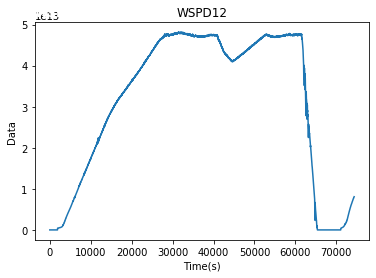

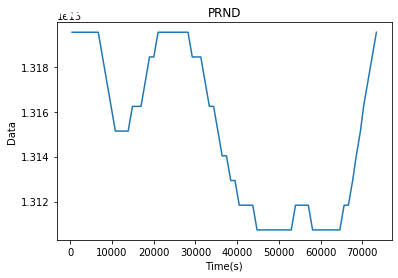

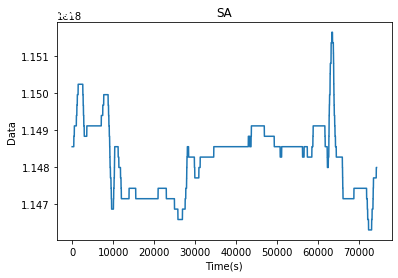

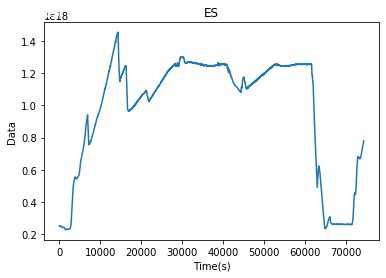

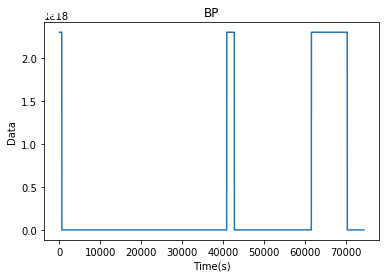

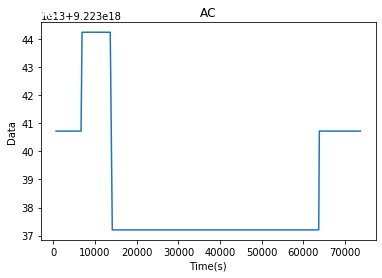

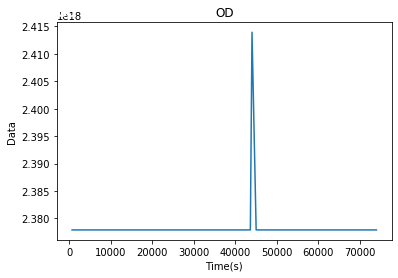

In [6]:
a = 0
for i in ECUList:
  fig = plt.figure(figsize=(6,4)).add_subplot(111)
  time = str(i.columns[0])
  data = str(i.columns[1])
  fig.set_title(str(i.columns.values[1]),loc='left',fontsize='large',fontweight='bold',color='white')
  plt.ylabel('Data')
  plt.xlabel('Time(s)')
  plt.title(list(dic.keys())[a])
  a = a+1
  fig.plot(i[time].values,i[data].values)


In [7]:
for i in ECUList:
  max = int(i[i.columns[1]].max())
  min = int(i[i.columns[1]].min())
  #print(str(i.columns.values[1]) +" "+ str(imax)+" "+str(imin)+" "+str(imax-imin))
  i[i.columns.values[1]]=i[i.columns.values[1]].apply(lambda x:(int(x)-min)/(max-min))
# for i in ECUList:
#   print(i)


# 合并

In [8]:
timedf = pd.DataFrame({'Timestamp':np.arange(ECU.Timestamp.min(),ECU.Timestamp.max())})
ECUnew = timedf
for i in ECUList:
  ECUnew = pd.merge(ECUnew,i,how='left',on='Timestamp')
ECUnew.set_index(np.arange(ECUnew.Timestamp.min(),ECUnew.Timestamp.max()+1),inplace=True)
ECUnew = ECUnew.drop(columns='Timestamp')
ECUnew

,Fuel,TP,WSPD34,WSPD12,PRND,SA,ES,BP,AC,OD
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0.421053,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
74352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74353,NaN,0.00576,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74355,NaN,NaN,NaN,0.167901,NaN,NaN,NaN,NaN,NaN,NaN


# NaN处理

In [9]:
for column in list(ECUnew.columns):
    ECUnew[column]=ECUnew[column].fillna(method='ffill')
ECUnew = ECUnew.dropna(axis=0,how='any')
ECUnew

,Fuel,TP,WSPD34,WSPD12,PRND,SA,ES,BP,AC,OD
1015,0.309673,0.889857,0.000000,0.000000,0.999998,0.526316,0.013560,0.0,0.5,0.000000e+00
1016,0.309673,0.889857,0.000000,0.000000,0.999998,0.526316,0.013560,0.0,0.5,0.000000e+00
1017,0.309673,0.889857,0.000000,0.000000,0.999998,0.526316,0.013560,0.0,0.5,0.000000e+00
1018,0.309673,0.889857,0.000000,0.000000,0.999998,0.526316,0.014020,0.0,0.5,0.000000e+00
1019,0.309673,0.889857,0.000000,0.000000,0.999998,0.526316,0.014020,0.0,0.5,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...
74352,0.643006,0.005777,0.166204,0.167634,0.999998,0.315790,0.450241,0.0,0.5,2.775558e-17
74353,0.643006,0.005760,0.166204,0.167634,0.999998,0.315790,0.450241,0.0,0.5,2.775558e-17
74354,0.643006,0.005760,0.166204,0.167634,0.999998,0.315790,0.450241,0.0,0.5,2.775558e-17
74355,0.643006,0.005760,0.166204,0.167901,0.999998,0.315790,0.450241,0.0,0.5,2.775558e-17


# 计算差值

In [10]:
ECUshift = ECUnew.shift(-1)
ECUdiff = ECUnew - ECUshift
ECUdiff = ECUdiff.drop(ECUdiff.index[len(ECUdiff)-1])
ECUdiff

,Fuel,TP,WSPD34,WSPD12,PRND,SA,ES,BP,AC,OD
1015,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
1016,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
1017,0.0,0.000000,0.000000,0.000000,0.0,0.0,-0.00046,0.0,0.0,0.0
1018,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
1019,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
74351,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
74352,0.0,0.000017,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
74353,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
74354,0.0,0.000000,0.000000,-0.000268,0.0,0.0,0.00000,0.0,0.0,0.0


是否全为0
全为0则去除
OD只有一处不为0,也去除

In [11]:
for i in ECUdiff.columns:
    sum = ECUdiff[i].apply(lambda x:abs(x)).sum()
    print(i+":"+str(sum))
ECUdiff = ECUdiff.drop(['OD'],axis=1)

ECUdiff

Fuel:7.249130132219903
TP:7.221410718867312
WSPD34:5.340312146432732
WSPD12:10.234546028269591
PRND:3.2499976167500773
SA:5.894791367765562
ES:5.919099116455087
BP:3.999999970213537
AC:1.999999999992724
OD:2.0


,Fuel,TP,WSPD34,WSPD12,PRND,SA,ES,BP,AC
1015,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0
1016,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0
1017,0.0,0.000000,0.000000,0.000000,0.0,0.0,-0.00046,0.0,0.0
1018,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0
1019,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
74351,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0
74352,0.0,0.000017,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0
74353,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0
74354,0.0,0.000000,0.000000,-0.000268,0.0,0.0,0.00000,0.0,0.0


PCA主成分分析
在减少需要分析的指标同时，
尽量减少原指标包含信息的损失，
以达到对所收集数据进行全面分析的目的
最后去掉重复项

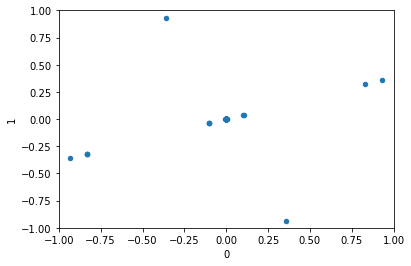

In [12]:
pca = PCA(n_components=2)
ECU_pca = pd.DataFrame(pca.fit_transform(ECUdiff))
ECU_pca = ECU_pca.drop_duplicates()
ECU_pca.plot(0,1,kind = 'scatter',xlim=(-1,1),ylim=(-1,1))

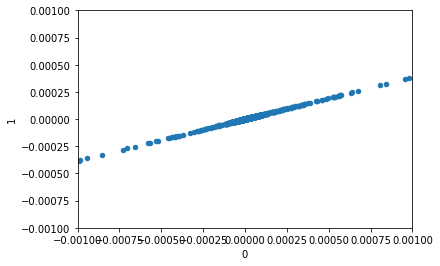

In [13]:
ECU_pca.plot(0,1,kind = 'scatter',xlim=(-0.001,0.001),ylim=(-0.001,0.001))

保存为CSV文件

In [14]:
ECU_pca.to_csv(path_or_buf=r'./data/ECUnew.csv',na_rep='NaN',header=False,index=False,index_label=None,mode='w')

基于密度峰值的聚类分析

In [15]:
# import CFSDP 
# CFSDP.CFSDP_for_ipynb('./data/ECUnew.csv')